In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Lampung.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  354 non-null    datetime64[ns]
 1   Tn       349 non-null    float64       
 2   Tx       352 non-null    float64       
 3   Tavg     353 non-null    float64       
 4   RH_avg   353 non-null    float64       
 5   RR       289 non-null    float64       
 6   ss       353 non-null    float64       
 7   ff_x     353 non-null    float64       
 8   ddd_x    353 non-null    float64       
 9   ff_avg   353 non-null    float64       
 10  ddd_car  353 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 30.5+ KB


<ipython-input-2-e6896e025f4a>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,22.8,30.0,15.5,26.1
1,2023-02-01,23.4,30.7,1.3,26.1
2,2023-03-01,23.4,28.6,NaN,25.7
3,2023-04-01,23.4,30.6,8888.0,26.4
4,2023-05-01,23.8,31.6,8888.0,26.0
...,...,...,...,...,...
349,2023-12-16,24.2,35.0,NaN,31.3
350,2023-12-17,25.4,34.8,0.0,31.3
351,2023-12-18,24.6,35.0,0.0,31.5
352,2023-12-19,25.0,34.0,0.0,31.2


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

0

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,22.8,30.0,15.5,26.1
1,31,31,2023-01-02,23.8,30.6,0.0,26.9
2,59,59,2023-01-03,22.2,30.6,12.5,24.9
3,90,90,2023-01-04,22.6,30.4,2.8,26.4
4,120,120,2023-01-05,23.6,32.0,52.2,27.2
...,...,...,...,...,...,...,...
349,349,349,2023-12-16,24.2,35.0,NaN,31.3
350,350,350,2023-12-17,25.4,34.8,0.0,31.3
351,351,351,2023-12-18,24.6,35.0,0.0,31.5
352,352,352,2023-12-19,25.0,34.0,0.0,31.2


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          5
Tx          2
RR         65
Tavg        1
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

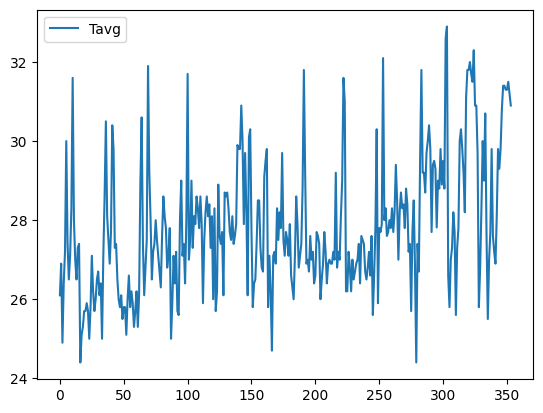

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

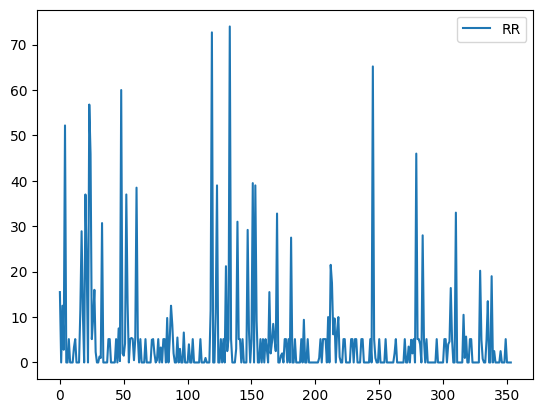

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.8,30.0,15.500000,26.1,30.6,26.9,0.0
1,31,31,2023-01-02,23.8,30.6,0.000000,26.9,30.6,24.9,12.5
2,59,59,2023-01-03,22.2,30.6,12.500000,24.9,30.4,26.4,2.8
3,90,90,2023-01-04,22.6,30.4,2.800000,26.4,32.0,27.2,52.2
4,120,120,2023-01-05,23.6,32.0,52.200000,27.2,33.6,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...
349,349,349,2023-12-16,24.2,35.0,5.145329,31.3,34.8,31.3,0.0
350,350,350,2023-12-17,25.4,34.8,0.000000,31.3,35.0,31.5,0.0
351,351,351,2023-12-18,24.6,35.0,0.000000,31.5,34.0,31.2,0.0
352,352,352,2023-12-19,25.0,34.0,0.000000,31.2,34.6,30.9,0.0


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,15.500000,26.1,26.9,0.0
1,0.000000,26.9,24.9,12.5
2,12.500000,24.9,26.4,2.8
3,2.800000,26.4,27.2,52.2
4,52.200000,27.2,30.0,0.0
...,...,...,...,...
349,5.145329,31.3,31.3,0.0
350,0.000000,31.3,31.5,0.0
351,0.000000,31.5,31.2,0.0
352,0.000000,31.2,30.9,0.0


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,15.500000,26.1,26.9,0.000000
1,0.000000,26.9,24.9,12.500000
2,12.500000,24.9,26.4,2.800000
3,2.800000,26.4,27.2,52.200000
4,52.200000,27.2,30.0,0.000000
...,...,...,...,...
348,0.000000,31.4,31.3,5.145329
349,5.145329,31.3,31.3,0.000000
350,0.000000,31.3,31.5,0.000000
351,0.000000,31.5,31.2,0.000000


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,15.500000,26.1,26.9,0.000000,0
1,0.000000,26.9,24.9,12.500000,1
2,12.500000,24.9,26.4,2.800000,2
3,2.800000,26.4,27.2,52.200000,3
4,52.200000,27.2,30.0,0.000000,4
...,...,...,...,...,...
348,0.000000,31.4,31.3,5.145329,348
349,5.145329,31.3,31.3,0.000000,349
350,0.000000,31.3,31.5,0.000000,350
351,0.000000,31.5,31.2,0.000000,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,29.5
283,283,31.8
284,284,29.2
285,285,29.2
286,286,28.7
...,...,...
348,348,31.4
349,349,31.3
350,350,31.3
351,351,31.5


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([28.57966622, 29.58580012, 28.45201648, 28.45369929, 28.23702317,
       28.67542384, 28.80812201, 28.98449197, 28.72414406, 27.80871935,
       28.55282254, 28.59817714, 28.51251637, 27.86567934, 28.38486664,
       28.29920587, 28.73760655, 28.34624328, 28.60995681, 28.30593712,
       29.96714782, 30.09984599, 27.35020624, 27.00251476, 27.52825901,
       27.66095718, 28.05568607, 27.83900995, 26.92358524, 27.66768843,
       27.88773017, 28.85019229, 28.98289046, 28.76621434, 28.50586643,
       28.07083137, 29.33899599, 29.64638131, 29.64806412, 29.73709051,
       29.60775796, 29.5220972 , 29.8731543 , 29.2634321 , 29.26511491,
       28.74273628, 27.04121941, 27.47962009, 28.1363797 , 28.88048288,
       28.44544783, 29.18955101, 27.83740844, 26.92198373, 27.57874334,
       27.88612866, 28.80491899, 27.84582249, 27.67281816, 27.54348561,
       28.06922986, 28.81333304, 28.59665692, 28.81669866, 29.25509934,
       29.51881287, 29.52049568, 29.47850671, 29.48018952, 29.56

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

1.35090045978013 2.713199895710279


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,29.5
283,283,31.8
284,284,29.2
285,285,29.2
286,286,28.7
...,...,...
348,348,31.4
349,349,31.3
350,350,31.3
351,351,31.5


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,28.579666
283,29.585800
284,28.452016
285,28.453699
286,28.237023
...,...
348,29.520496
349,29.478507
350,29.480190


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-26-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,26.1,NaN
1,26.9,NaN
2,24.9,NaN
3,26.4,NaN
4,27.2,NaN
...,...,...
348,31.4,29.520496
349,31.3,29.478507
350,31.3,29.480190
351,31.5,29.569216


<Axes: >

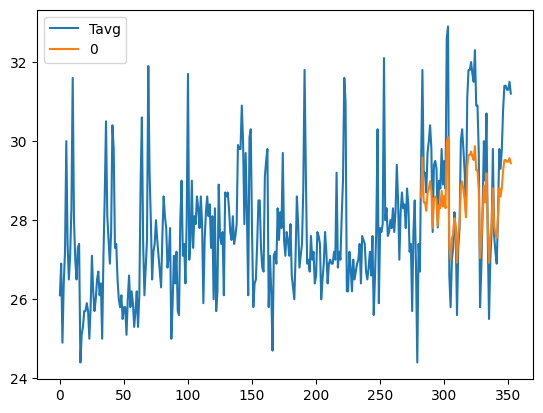

In [27]:
kan.plot()

In [28]:
new_data = [[354, 28.6],[355,28.6],[356,28.6],[357,28.6],[358,28.6],[359,28.6],[360,28.6]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.30778252, 28.30946533, 28.31114814, 28.31283095, 28.31451376,
       28.31619658, 28.31787939])

In [30]:
kan.to_json('Prediksi Lampung.json')